In [1]:
import glob
import json
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

from requests import get
from bs4 import BeautifulSoup

In [2]:
themes = pd.concat([pd.read_csv(f, compression='gzip') for f in glob.glob("../data/themes/*.gzip")], ignore_index=True)

In [3]:
themes

,Themes
0,SECURITY_SERVICES;TAX_FNCACT;TAX_FNCACT_POLICE...
1,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...
2,TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_RUSSIA;T...
3,UNGP_FORESTS_RIVERS_OCEANS;ENV_CLIMATECHANGE;U...
4,SECURITY_SERVICES;TAX_FNCACT;TAX_FNCACT_POLICE...
5,RESIGNATION;EPU_POLICY;EPU_POLICY_WHITE_HOUSE;...
6,TRIAL;CORRUPTION;WB_2019_ANTI_CORRUPTION_LEGIS...
7,PROTEST;SECURITY_SERVICES;TAX_FNCACT;TAX_FNCAC...
8,NATURAL_DISASTER;NATURAL_DISASTER_HURRICANE;CR...
9,TAX_POLITICAL_PARTY;TAX_POLITICAL_PARTY_REPUBL...


In [4]:
tags_social = "DISABILITY|DISCRIMINATION|EDUCATION|GENDERVIOLENCE|GENTRIFICATION|HARASSMENT|HATE_SPEECH|IMMIGRATION|LGBT|MEDICAL_SECURITY|MOVEMENT_SOCIAL|PROTEST|REFUGEES|UNEMPLOYMENT|UNREST_POLICEBRUTALITY"
ind_social = themes.Themes.str.contains(tags_social)

with open("../data/indices/social.pkl", "wb") as f:
    pickle.dump(themes[ind_social].index.values, f)

In [34]:
tags_conflict = "ARMEDCONFLICT|ARREST|ASSASSINATION|CEASEFIRE|CRIME_|DRUG_TRADE|FIRE_ARM_OWNERSHIP|HUMAN_TRAFFICKING|JIHAD|KIDNAP|KILL|MILITARY|ORGANIZED_CRIME|POLITICAL_|SUICIDE_ATTACK|SURVEILLANCE|TAX_CARTELS|TAX_TERROR_GROUP|TERROR|TORTURE"
ind_conflict = themes.Themes.str.contains(tags_conflict)

with open("../data/indices/conflict.pkl", "wb") as f:
    pickle.dump(themes[ind_conflict].index.values, f)

In [35]:
tags_env = "AGRICULTURE|ENV_|MOVEMENT_ENVIRONMENTAL|NATURAL_DISASTER"
ind_env = themes.Themes.str.contains(tags_env)

with open("../data/indices/env.pkl", "wb") as f:
    pickle.dump(themes[ind_env].index.values, f)

In [36]:
tags_health = "FOOD_SECURITY|GENERAL_HEALTH|HEALTH_|MEDICAL|TAX_DISEASE"
ind_health = themes.Themes.str.contains(tags_health)

with open("../data/indices/health.pkl", "wb") as f:
    pickle.dump(themes[ind_health].index.values, f)

In [37]:
tags_eco = "AUSTERITY|BLACK_MARKET|ECON_|FUELPRICES"
ind_eco = themes.Themes.str.contains(tags_eco)

with open("../data/indices/eco.pkl", "wb") as f:
    pickle.dump(themes[ind_eco].index.values, f)

In [2]:
with open("../data/indices/social.pkl", "rb") as f:
    ind_social = pickle.load(f)
with open("../data/indices/conflict.pkl", "rb") as f:
    ind_conflict = pickle.load(f)
with open("../data/indices/env.pkl", "rb") as f:
    ind_env = pickle.load(f)
with open("../data/indices/health.pkl", "rb") as f:
    ind_health = pickle.load(f)
with open("../data/indices/eco.pkl", "rb") as f:
    ind_eco = pickle.load(f)

In [5]:
full_df = pd.concat([pd.read_csv(f, compression='gzip', usecols=[0,1,2,3,4]) for f in glob.glob("../data/full-data/*.gzip")], ignore_index=True)
full_df

,GLOBALEVENTID,MentionSourceName,DocumentIdentifier,DATE,V2Tone
0,775840525,npr.org,https://www.npr.org/series/630949957/maddie-ab...,20180731204500,"0,0,0,0,11.7647058823529,0,33"
1,732558216,npr.org,https://www.npr.org/2018/02/21/587502620/morni...,20180221134500,"-11.5942028985507,2.89855072463768,14.49275362..."
2,713024331,npr.org,https://www.npr.org/2017/12/07/569039668/whats...,20171207104500,"-6.25,3.125,9.375,12.5,15.625,0,63"
3,723461406,npr.org,https://www.npr.org/2018/01/15/578105649/prote...,20180118181500,"-0.0723065798987705,2.60303687635575,2.6753434..."
4,727862977,npr.org,https://www.npr.org/2018/02/03/582902910/why-i...,20180203141500,"0.785854616895874,2.35756385068762,1.571709233..."
5,734379956,npr.org,https://www.npr.org/2018/02/27/588247674/songs...,20180227143000,"-2.92740046838407,2.34192037470726,5.269320843..."
6,802713234,npr.org,https://www.npr.org/2018/11/14/667870035/amy-h...,20181115183000,"3.125,3.81944444444444,0.694444444444444,4.513..."
7,714697435,npr.org,https://www.npr.org/event/music/569479258/big-...,20171213151500,"0.458715596330275,4.58715596330275,4.128440366..."
8,720362851,npr.org,https://www.npr.org/2018/01/06/576197738/the-f...,20180107151500,"0.241837968561064,2.29746070133011,2.055622732..."
9,728691638,npr.org,https://www.npr.org/2018/02/06/583666121/its-i...,20180206211500,"-0.74487895716946,1.86219739292365,2.607076350..."


In [10]:
# distribution of nb of articles by sources
nb_articles = full_df.groupby("MentionSourceName").size()
nb_articles.describe()

count        50.000000
mean     118257.800000
std      125279.132072
min        1528.000000
25%       20088.000000
50%       71474.500000
75%      171119.000000
max      436592.000000
dtype: float64

In [11]:
nb_articles.sort_values(ascending=False)

MentionSourceName
nbcnews.com            436592
seattletimes.com       410271
miamiherald.com        389190
foxnews.com            380452
stltoday.com           365876
seattlepi.com          325135
nytimes.com            297310
nydailynews.com        281437
chicagotribune.com     237356
wtop.com               197579
latimes.com            196600
bostonherald.com       184029
newsweek.com           172584
newsmax.com            166724
breitbart.com          152387
philly.com             151145
politico.com           150017
usatoday.com           149436
cbsnews.com            116578
huffingtonpost.com     114562
nypost.com             112917
abc13.com               91645
npr.org                 89619
abc7news.com            83612
newsday.com             82466
boston.com              60483
mercurynews.com         53289
ktla.com                50253
denverpost.com          43968
fox2now.com             42273
kron4.com               32681
wgntv.com               30834
kdvr.com              

In [12]:
sources = nb_articles.sort_values(ascending=False).index.values

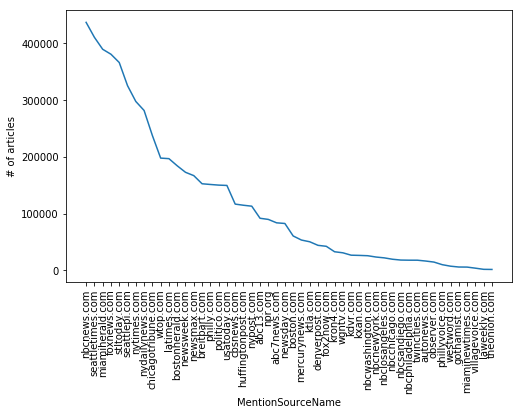

In [13]:
plt.figure(figsize=(8,5))
nb_articles.sort_values(ascending=False).plot()
plt.xticks(range(len(sources)), sources, rotation=90)
plt.ylabel("# of articles")
plt.show()

In [14]:
with open("../data/map_sources_url_to_name.pkl", "rb") as f:
    name_map = pickle.load(f)

In [15]:
def get_icon(website, errors):
    possible = ["shortcut icon", "icon", "Shortcut Icon"]
    my_header = {'user-agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:63.0) Gecko/20100101 Firefox/63.0",}
    url = "http://"+website
    try:
        r = get(url, headers=my_header)
        soup = BeautifulSoup(r.text, 'html.parser')
        icon_link = None
        i = 0
        while icon_link is None:
            icon_link = soup.find("link", rel=possible[i])
            i+=1
        try:
            icon = get(icon_link['href'], headers=my_header)
            url = icon_link['href']
        except:
            icon = get(url + icon_link['href'], headers=my_header)
            url += icon_link['href']
        return url
    except:
        errors.append(website)

In [16]:
events_covered = df.groupby("MentionSourceName")["GLOBALEVENTID"].unique()

In [17]:
df["avg_tone"] = df.V2Tone.map(lambda l : str(l).split(",")[0]).astype(float)

In [18]:
avg_tone_by_source_x_event = df.groupby(["MentionSourceName","GLOBALEVENTID"]).mean()["avg_tone"]

In [29]:
nodes = []
errors_icon = []
edges = []
new_sources = set(sources)

for source1 in tqdm_notebook(sources):
    nodes.append({  'id' : source1, 
                    'size' : int(nb_articles[source1]), 
                    'name' : name_map[source1],
                    'favicon' : get_icon(source1, errors_icon),
                    'avg_tone' : avg_tone_by_source_x_event[source1].mean(),
                 })
    
    events1 = set(events_covered[source1])
    new_sources = new_sources - {source1}
    
    for source2 in new_sources:
        if source1==source2:
            continue
            
        events2 = set(events_covered[source2])
        # union
        #coverage_ratio = len(events1 & events2) / len(events1 | events2)
        
        # sqrt
        #coverage_ratio = len(events1 & events2) / np.sqrt(len(events1) * len(events2))
        
        # min
        coverage_ratio = len(events1 & events2) / min(len(events1), len(events2))
        
        tone_diff = np.abs(avg_tone_by_source_x_event[source1]-avg_tone_by_source_x_event[source2]).dropna().mean()
        
        edges.append({'source': source1, 'target': source2, 'weight': coverage_ratio, 'tone_diff': tone_diff})  

In [21]:
errors_icon

['seattletimes.com',
 'seattlepi.com',
 'chicagotribune.com',
 'bostonherald.com',
 'npr.org',
 'gothamist.com']

In [22]:
for n in nodes:
    if n["id"] == "npr.org":
        n['favicon'] = "https://media.npr.org/templates/favicon/favicon-32x32.png"
    if n["id"] == 'http://chicagotribune.com':
        n['favicon'] = 'https://s.m.huffpost.com/assets/favicon-2020e123c064086aad150fe909c53771f862d7c76cd62f6146e81d533845fd7d.ico'

In [23]:
nodes

[{'id': 'nbcnews.com',
  'size': 436592,
  'name': 'NBC News',
  'favicon': 'https://nodeassets.nbcnews.com/cdnassets/projects/ramen/favicon/nbcnews/all-other-sizes-PNG.ico/favicon.ico',
  'avg_tone': -2.8335459153435534},
 {'id': 'seattletimes.com',
  'size': 410271,
  'name': 'The Seattle Times',
  'favicon': None,
  'avg_tone': -3.9762484139168466},
 {'id': 'miamiherald.com',
  'size': 389190,
  'name': 'Miami Herald ',
  'favicon': 'https://www.miamiherald.com/wps/source/images/miamiherald/favicon.png',
  'avg_tone': -3.0670957548276165},
 {'id': 'foxnews.com',
  'size': 380452,
  'name': 'Fox News ',
  'favicon': 'http://foxnews.com//static.foxnews.com/static/orion/styles/img/fox-news/favicons/favicon.ico',
  'avg_tone': -3.8773960499331572},
 {'id': 'stltoday.com',
  'size': 365876,
  'name': 'STLtoday',
  'favicon': 'https://www.stltoday.com/content/tncms/site/icon.ico',
  'avg_tone': -3.129151847771128},
 {'id': 'seattlepi.com',
  'size': 325135,
  'name': 'Seattlepi',
  'favic

In [24]:
len(edges)

1225

In [30]:
for i in np.arange(0,0.101,0.005):
    threshold = i
    filtered_edges = [ e for e in edges if e['weight'] > threshold ]
    network = {'nodes': nodes, 'edges': filtered_edges}
    with open("../data/min/threshold_"+str(int(threshold*1000))+"_permille.json", "w") as f:
        json.dump(network, f, indent=2)

In [47]:
full_df["month"] = pd.to_datetime(full_df.DATE, format='%Y%m%d%H%M%S').dt.month

In [ ]:
for ind in [ind_social, ind_conflict, ind_env, ind_health, ind_eco]:
    theme_df = full_df[ind]
    for m in range(13):
        directory = "../data/"+ind+"/"+m
        if not os.path.exists(directory):
            os.makedirs(directory)
        if m == 0:
            df = theme_df
        else:
            df = theme_df[theme_df.month==m]
        
        events_covered = df.groupby("MentionSourceName")["GLOBALEVENTID"].unique()

        df["avg_tone"] = df.V2Tone.map(lambda l : str(l).split(",")[0]).astype(float)

        avg_tone_by_source_x_event = df.groupby(["MentionSourceName","GLOBALEVENTID"]).mean()["avg_tone"]

        nodes = []
        errors_icon = []
        edges = []
        new_sources = set(sources)

        for source1 in tqdm_notebook(sources):
            nodes.append({  'id' : source1, 
                            'size' : int(nb_articles[source1]), 
                            'name' : name_map[source1],
                            'favicon' : get_icon(source1, errors_icon),
                            'avg_tone' : avg_tone_by_source_x_event[source1].mean(),
                         })

            events1 = set(events_covered[source1])
            new_sources = new_sources - {source1}

            for source2 in new_sources:
                if source1==source2:
                    continue

                events2 = set(events_covered[source2])
                # union
                #coverage_ratio = len(events1 & events2) / len(events1 | events2)

                # sqrt
                #coverage_ratio = len(events1 & events2) / np.sqrt(len(events1) * len(events2))

                # min
                coverage_ratio = len(events1 & events2) / min(len(events1), len(events2))

                tone_diff = np.abs(avg_tone_by_source_x_event[source1]-avg_tone_by_source_x_event[source2]).dropna().mean()

                edges.append({'source': source1, 'target': source2, 'weight': coverage_ratio, 'tone_diff': tone_diff})  

        for n in nodes:
            if n["id"] == "npr.org":
                n['favicon'] = "https://media.npr.org/templates/favicon/favicon-32x32.png"
            if n["id"] == 'http://chicagotribune.com':
                n['favicon'] = 'https://s.m.huffpost.com/assets/favicon-2020e123c064086aad150fe909c53771f862d7c76cd62f6146e81d533845fd7d.ico'

        for i in np.arange(0,0.101,0.005):
            threshold = i
            filtered_edges = [ e for e in edges if e['weight'] > threshold ]
            network = {'nodes': nodes, 'edges': filtered_edges}
            
            with open(directory+"/threshold_"+str(int(threshold*1000))+"_permille.json", "w") as f:
                json.dump(network, f, indent=2)